# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definition

In [2]:
def extract_region(image_name):
    # Get the last character of the filename (assumes it's a number)
    if image_name[-1] == '1':
        return 'Central'
    elif image_name[-1] == '2':
        return 'Middle'
    elif image_name[-1] == '3':
        return 'Peripheral'
    else:
        return None  # If no matching region is found


In [3]:
def bland_altman_plot_all_regions(manual_counts, method_counts, model_name, method_name,set, ax):
    """
    Function to create a single Bland-Altman plot for all regions combined.
    Computes and displays the overall mean difference, min error, and max error.
    """
    # Colors for visualization
    region_colors = {'Central': 'blue', 'Middle': 'green', 'Peripheral': 'red'}

    all_differences = []
    all_averages = []

    # Collect all data from different regions
    for region in manual_counts.keys():
        manual = manual_counts[region]
        method = method_counts[region]
        if len(manual) == 0 or len(method) == 0:
            print(f"Warning: No data for {region}, skipping this region.")
            continue

        differences = method - manual
        averages = (method + manual) / 2

        all_differences.extend(differences)
        all_averages.extend(averages)

        # Scatter plot for the region's data
        ax.scatter(manual, differences, color=region_colors[region], label=region, alpha=0.7)

    if not all_differences:
        print("No data available for Bland-Altman plot.")
        return

    # Convert to numpy arrays
    all_differences = np.array(all_differences)
    all_averages = np.array(all_averages)

    # Compute overall statistics
    mean_diff = np.mean(all_differences)
    min_error = np.min(all_differences)
    max_error = np.max(all_differences)

    # Plot overall mean difference
    ax.axhline(mean_diff, color='black', linestyle='--', label=f"Mean Diff: {mean_diff:.2f}")

    # Plot min and max error lines
    ax.axhline(min_error, color='purple', linestyle='-.', label=f"Underestimation Error: {min_error:.2f}")
    ax.axhline(max_error, color='brown', linestyle='-.', label=f"Overestimation Error: {max_error:.2f}")

    # Set title and labels
    ax.set_title(f"Bland–Altman plot of {model_name} + {method_name}  vs manual counts on {set} - All Regions")
    ax.set_xlabel('Average cell counts of  Sample')
    ax.set_ylabel('Difference (Methodology counts - Manual counts) ')

    # Move the legend to the right
    ax.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax.grid(True)

    print(f"Mean Difference: {mean_diff:.2f}, Min Error: {min_error:.2f}, Max Error: {max_error:.2f}")


In [4]:
def bland_altman_plot_all_regions_with_boundries(manual_counts, method_counts, model_name, method_name,set, ax, boundries= False):
    """
    Function to create a single Bland-Altman plot for all regions combined.
    Computes and displays the overall mean difference, min error, and max error.
    Also plots ±15% of ground truth as curved boundary lines.
    """
    # Colors for visualization
    region_colors = {'Central': 'blue', 'Middle': 'green', 'Peripheral': 'red'}

    all_differences = []
    all_averages = []
    all_gt = []

    # Collect all data from different regions
    for region in manual_counts.keys():
        manual = manual_counts[region]
        method = method_counts[region]
        if len(manual) == 0 or len(method) == 0:
            print(f"Warning: No data for {region}, skipping this region.")
            continue

        differences = method - manual
        averages = (method + manual) / 2

        all_differences.extend(differences)
        all_averages.extend(averages)
        all_gt.extend(manual)

        # Scatter plot for the region's data
        ax.scatter(manual, differences, color=region_colors[region], label=region, alpha=0.7)

    if not all_differences:
        print("No data available for Bland-Altman plot.")
        return

    # Convert to numpy arrays
    all_differences = np.array(all_differences)
    all_averages = np.array(all_averages)
    all_gt = np.array(all_gt)

    # Compute overall statistics
    mean_diff = np.mean(all_differences)
    min_error = np.min(all_differences)
    max_error = np.max(all_differences)

    # Plot overall mean difference
    ax.axhline(mean_diff, color='black', linestyle='--', label=f"Mean Diff: {mean_diff:.2f}")

    # Plot min and max error lines
    ax.axhline(min_error, color='purple', linestyle='-.', label=f"Underestimation Error: {min_error:.2f}")
    ax.axhline(max_error, color='brown', linestyle='-.', label=f"Overestimation Error: {max_error:.2f}")


    # --- Simpler ±15% of GT as reference lines ---
    if boundries:
        x_vals = np.arange(0, 500)  # or np.linspace(0, 600, 500) for smoother line
        y_upper = 0.15 * x_vals
        y_lower = -0.15 * x_vals

        ax.plot(x_vals, y_upper, color='orange', linestyle=':', label='±15% of GT')
        ax.plot(x_vals, y_lower, color='orange', linestyle=':')

        x_vals = np.arange(0, 500)  # or np.linspace(0, 600, 500) for smoother line
        y_upper = 0.10 * x_vals
        y_lower = -0.10 * x_vals

        ax.plot(x_vals, y_upper, color='green', linestyle=':', label='±10% of GT')
        ax.plot(x_vals, y_lower, color='green', linestyle=':')


    # Set title and labels

    ax.set_title(f"Bland–Altman plot of {model_name} + {method_name}  vs Manual Counts on {set} - All Regions")
    ax.set_xlabel('Average cell counts of Sample')
    ax.set_ylabel('Difference (Methodology counts - Manual counts)')

    # Move the legend to the right
    ax.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax.grid(True)

    print(f"Mean Difference: {mean_diff:.2f}, Min Error: {min_error:.2f}, Max Error: {max_error:.2f}")


In [5]:
def plot_address_set(csv_adress , model , method_name ,dataset_type,  train_or_test_set  , save_address):
    train_256_lm= pd.read_csv(csv_adress)
    # print(train_256_lm.head())
    #
    # train_256_lm_filtered = train_256_lm[train_256_lm.iloc[:, 0].astype(str).str.endswith('1')]
    # len(train_256_lm_filtered)
    # len(train_256_lm)
    # Initialize dictionaries to store data by region
    df= train_256_lm
    manual_counts = {'Central': [], 'Middle': [], 'Peripheral': []}
    light_unet_local_maxima = {'Central': [], 'Middle': [], 'Peripheral': []}
    counter=0

    # df2=df[df['status']=='train']
    # Iterate through the rows of the DataFrame to fill the dictionaries
    for _, row in df.iterrows():
        counter=counter+1
        # print(counter)
        # print(row['image name'])
        region = extract_region(row['Animal Name'])  # Extract the region from the filename
        if region:
            # print(row['Ground Truth_1'] ,row[models_methods[i]])
            manual_counts[region].append(row['Manual GT Cells'])  # Manual count
            # manual_counts[region].append(row['RBPMS count'])  # Manual count

            light_unet_local_maxima[region].append(row['removed overlapped cells'])  # Predicted count from  U-Net + Local Maxima

    # Convert lists to numpy arrays for easier manipulation
    manual_counts = {key: np.array(value) for key, value in manual_counts.items()}
    light_unet_local_maxima = {key: np.array(value) for key, value in light_unet_local_maxima.items()}
    # print(manual_counts)
    print(len(manual_counts['Central']) , len(manual_counts['Middle']) , len(manual_counts['Peripheral']))
    # Function to create a single Bland-Altman plot for multiple regions

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 12))

    # Call the function to plot Light U-Net + Local Maxima for all regions
    bland_altman_plot_all_regions_with_boundries(manual_counts, light_unet_local_maxima, model, method_name, dataset_type +'dataset - '+ train_or_test_set+' Set',ax, True)
    # Base title (empty)

    ax.set_ylim(-250, 150)
    # ax.set_xlim(0, 600)

    # Adjust layout to prevent overlap with the legend
    plt.tight_layout()



# Plotting ...

13 10 7
Mean Difference: 7.47, Min Error: -38.00, Max Error: 116.00


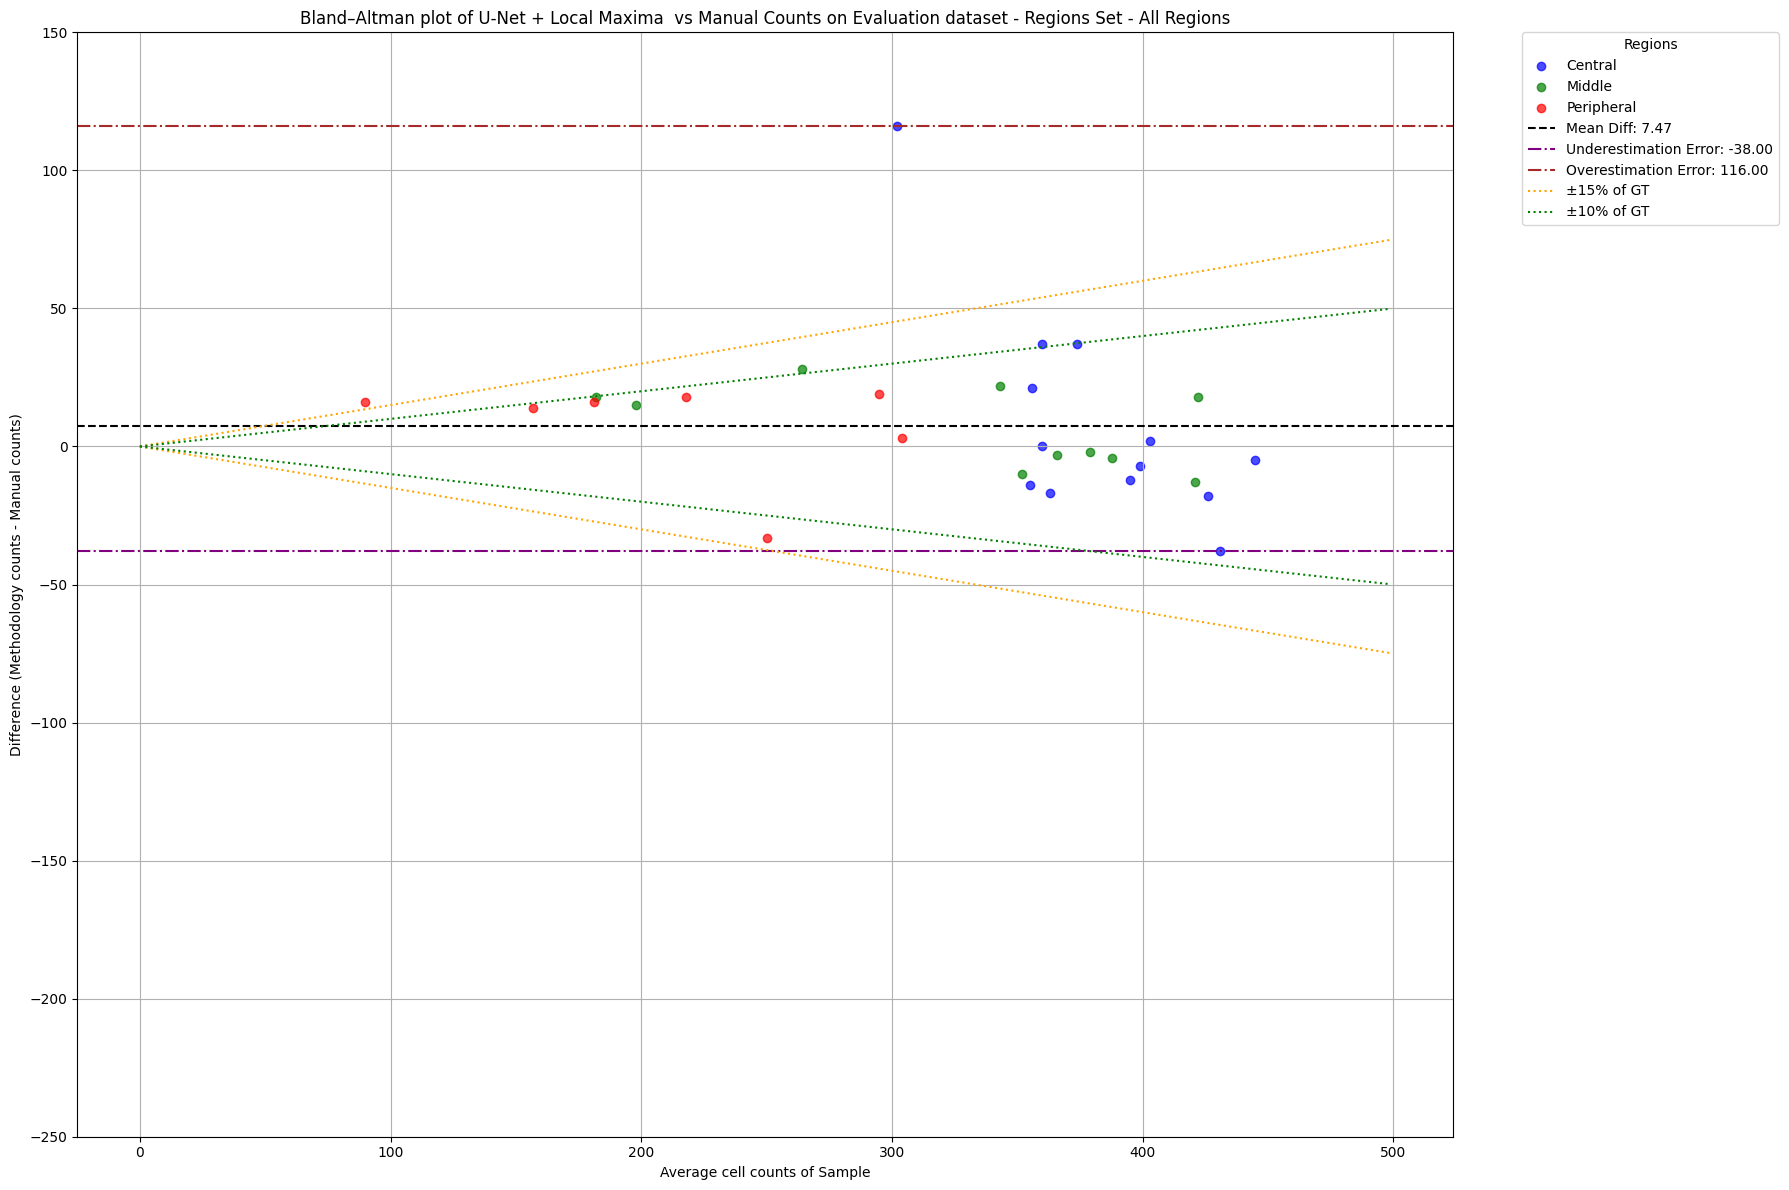

In [14]:
csv_address= './results/workflows/eval_workflow/eval_cell_counts.csv'
save_address= './results/workflows/bland_altmon_plots/workflow_eval_recons_boundries.jpg'



plot_address_set(csv_address , 'U-Net' , 'Local Maxima' , 'Evaluation ',  'Regions' , save_address )
# Show the plot
plt.savefig(save_address)
plt.show()

232 255 250
Mean Difference: -9.99, Min Error: -296.00, Max Error: 81.00


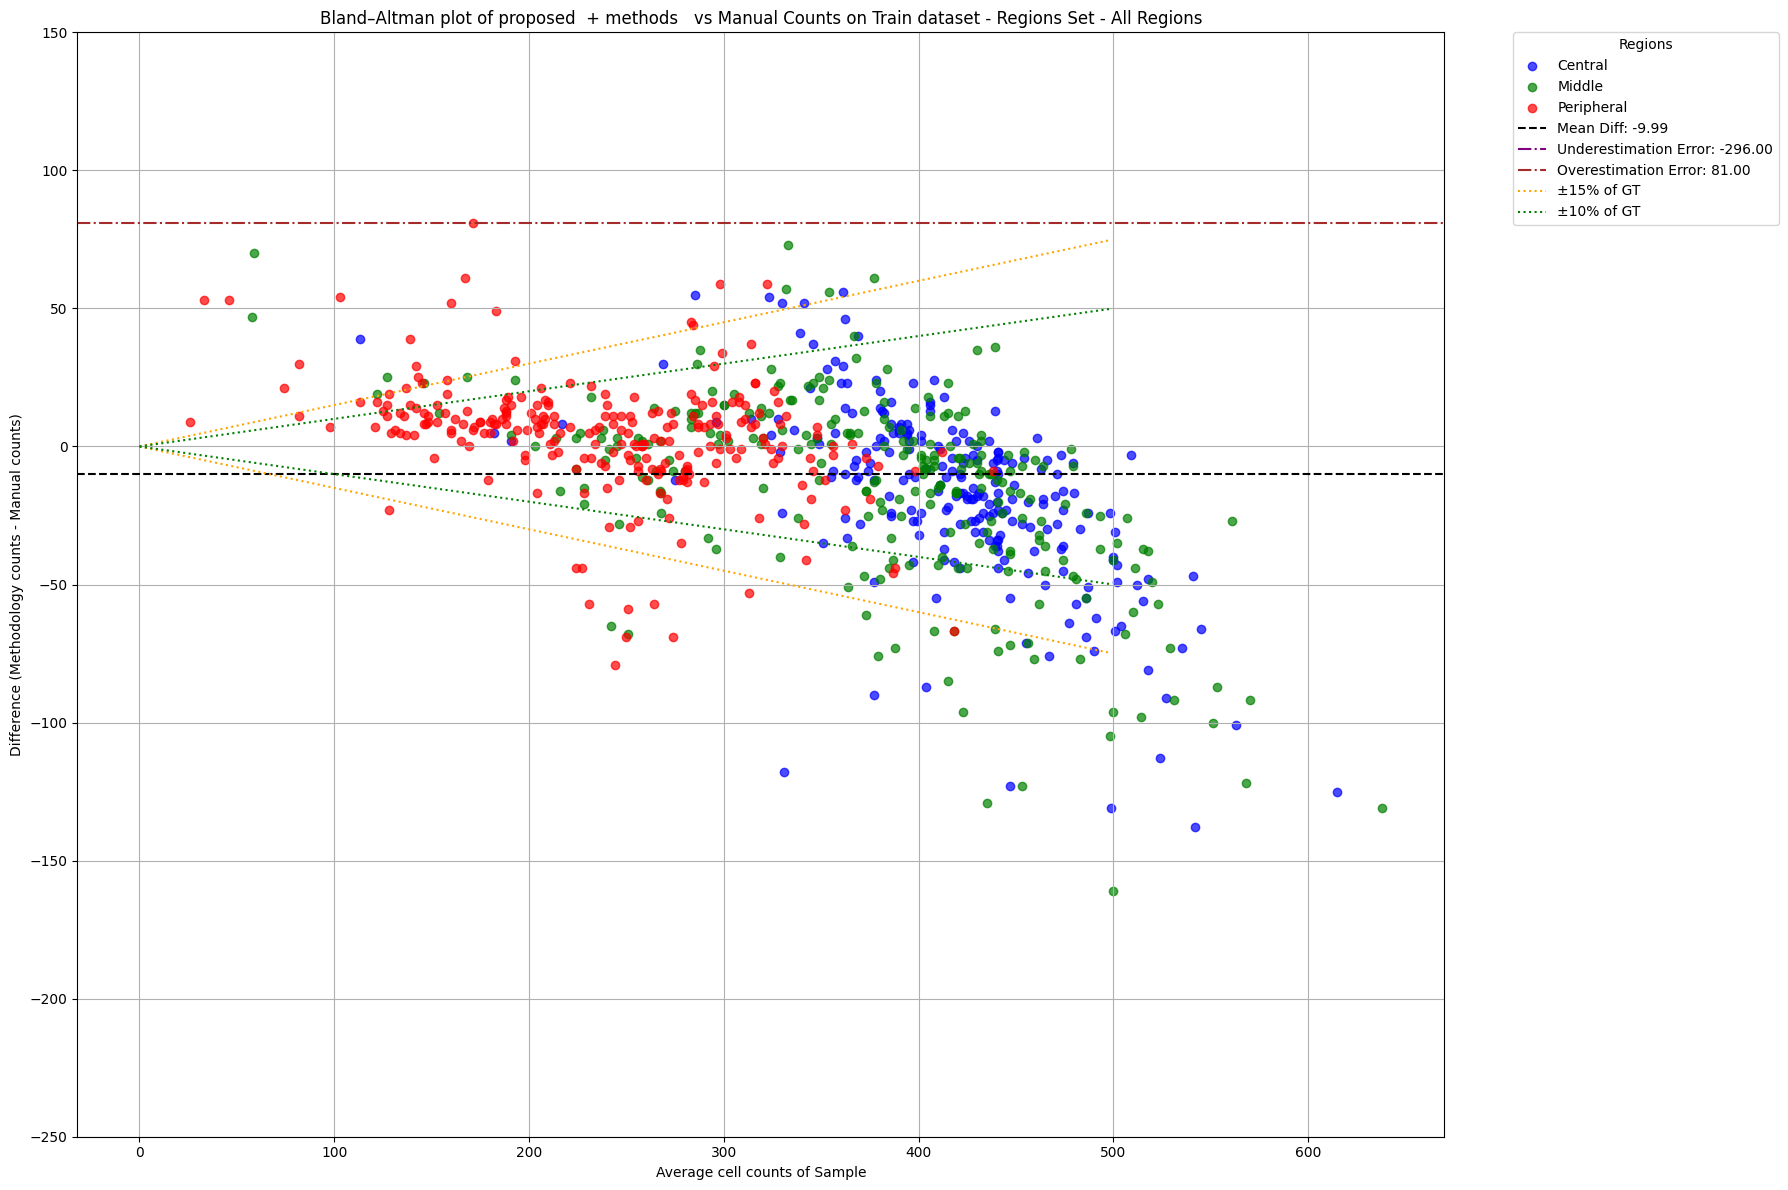

In [11]:
csv_address = "./results/workflows/train_workflow/train_cell_counts.csv"
save_address= "./results/workflows/bland_altmon_plots/workflow_train_recons_boundries.jpg"


plot_address_set(csv_address , 'proposed ' , 'methods ' , 'Train ',  'Regions' , save_address )
# Show the plot
plt.savefig(save_address)
plt.show()